# Heart Disease Diagnostic Analysis

## Problem Statement:
Health is real wealth in the pandemic time we all realized the brute effects of covid-19 on all irrespective of any status. You are required to analyze this health and medical data for better future preparation.
Do ETL: Extract- Transform and Load data from the heart disease diagnostic database
You can perform EDA through python. The database extracts various information such as Heart disease rates, Heart disease by gender, by age.
You can even compare attributes of the data set to extract necessary information. Make the necessary dashboard with the best you can extract from the data. Use various visualization and features and make the best dashboard
Find key metrics and factors and show the meaningful relationships between attributes. Do your own research and come up with your findings.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1.Load and Study the Data

In [ ]:
data=pd.read_csv('/content/Heart Disease data.csv')

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
  data.shape

(1025, 14)

## 2.Data Cleaning

### 2.1.Column Rename

In [ ]:
data=data.rename(columns={'cp':'chest_pain_type','trestbps':'rest_bp','fbs':'fast_blood_sugar','thalach':'max_heart_rate','exang':'exercise_induced_angina','oldpeak': 'st_depression','ca':'Vessel_Block','thal': 'thalassemia'})

In [ ]:
data.head()

,age,sex,chest_pain_type,rest_bp,chol,fast_blood_sugar,restecg,max_heart_rate,exercise_induced_angina,st_depression,slope,Vessel_Block,thalassemia,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**Description about the dataset**

- **age**: Age of the patient (numeric)
- **sex**: Sex of the patient (1 = male, 0 = female)
- **chest_pain_type**: Chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)
- **rest_bp**: Resting blood pressure (in mm Hg on admission to the hospital)
- **chol**: Serum cholesterol in mg/dl
- **fast_blood_sugar**: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
- **restecg**: Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy)
- **max_heart_rate**: Maximum heart rate achieved
- **exercise_induced_angina**: Exercise-induced angina (1 = yes, 0 = no)
- **st_depression**: ST depression induced by exercise relative to rest
(0 mm:normal.
1-2 mm: Mild ST depression; this might indicate mild ischemia.
2-3 mm: Moderate ST depression; this can suggest moderate ischemia and warrants further investigation.
3 mm: Severe ST depression; this indicates significant ischemia and usually requires immediate medical attention.)
- **slope**: The slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)
- **Vessel_Block**: Number of major vessels (0-3) colored by fluoroscopy, 4-NaN
(0: No major vessels have significant blockage.
1: One major vessel has significant blockage.
2: Two major vessels have significant blockage.
3: Three major vessels have significant blockage.)
- **thalassemia**: Thalassemia (0=NaN, 1 = normal, 2 = fixed defect, 3 = reversible defect)
- **target**: Diagnosis of heart disease (1 = heart disease, 0 = no heart disease)


### 2.2.Values Renaming

In [ ]:
data['sex'][data['sex']==0]='Female'
data['sex'][data['sex']==1]='Male'
data['chest_pain_type'][data['chest_pain_type']==0]='Typical angina'
data['chest_pain_type'][data['chest_pain_type']==1]='Atypical angina'
data['chest_pain_type'][data['chest_pain_type']==2]='Non-anginal pain'
data['chest_pain_type'][data['chest_pain_type']==3]='Asymptomatic'
data['fast_blood_sugar'][data['fast_blood_sugar']==0]='Lower than 120mg/dl'
data['fast_blood_sugar'][data['fast_blood_sugar']==1]='Greater than 120mg/dl'
data['restecg'][data['restecg']==0] ="Normal"
data['restecg'][data['restecg']==1] ="Having ST-T wave abnormality"
data['restecg'][data['restecg']==2] ="Showing probable or definite left ventricular hypertrophy"
data['exercise_induced_angina'][data['exercise_induced_angina']==0]='No'
data['exercise_induced_angina'][data['exercise_induced_angina']==1]='Yes'
data['slope'][data['slope']==0]='Upsloping'
data['slope'][data['slope']==1]='Flat'
data['slope'][data['slope']==2]='Downsloping'
data['thalassemia'][data['thalassemia']==1]='Normal'
data['thalassemia'][data['thalassemia']==2]='Fixed defect'
data['thalassemia'][data['thalassemia']==3]='Reversible defect'
data['target'][data['target']==0]='No Heart Disease'
data['target'][data['target']==1]='Heart Disease'

In [ ]:
data.head(15)

,age,sex,chest_pain_type,rest_bp,chol,fast_blood_sugar,restecg,max_heart_rate,exercise_induced_angina,st_depression,slope,Vessel_Block,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120mg/dl,Having ST-T wave abnormality,168,No,1.0,Downsloping,2,Reversible defect,No Heart Disease
1,53,Male,Typical angina,140,203,Greater than 120mg/dl,Normal,155,Yes,3.1,Upsloping,0,Reversible defect,No Heart Disease
2,70,Male,Typical angina,145,174,Lower than 120mg/dl,Having ST-T wave abnormality,125,Yes,2.6,Upsloping,0,Reversible defect,No Heart Disease
3,61,Male,Typical angina,148,203,Lower than 120mg/dl,Having ST-T wave abnormality,161,No,0.0,Downsloping,1,Reversible defect,No Heart Disease
4,62,Female,Typical angina,138,294,Greater than 120mg/dl,Having ST-T wave abnormality,106,No,1.9,Flat,3,Fixed defect,No Heart Disease
5,58,Female,Typical angina,100,248,Lower than 120mg/dl,Normal,122,No,1.0,Flat,0,Fixed defect,Heart Disease
6,58,Male,Typical angina,114,318,Lower than 120mg/dl,Showing probable or definite left ventricular ...,140,No,4.4,Upsloping,3,Normal,No Heart Disease
7,55,Male,Typical angina,160,289,Lower than 120mg/dl,Normal,145,Yes,0.8,Flat,1,Reversible defect,No Heart Disease
8,46,Male,Typical angina,120,249,Lower than 120mg/dl,Normal,144,No,0.8,Downsloping,0,Reversible defect,No Heart Disease
9,54,Male,Typical angina,122,286,Lower than 120mg/dl,Normal,116,Yes,3.2,Flat,2,Fixed defect,No Heart Disease


### 2.3.Data Description & datatype

In [ ]:
data.describe()

,age,rest_bp,chol,max_heart_rate,st_depression,Vessel_Block
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.754146
std,9.072290,17.516718,51.59251,23.005724,1.175053,1.030798
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,0.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,4.000000


In [ ]:
data.dtypes

,0
age,int64
sex,object
chest_pain_type,object
rest_bp,int64
chol,int64
fast_blood_sugar,object
restecg,object
max_heart_rate,int64
exercise_induced_angina,object
st_depression,float64


In [ ]:
data.index

RangeIndex(start=0, stop=1025, step=1)

In [ ]:
data.columns

Index(['age', 'sex', 'chest_pain_type', 'rest_bp', 'chol', 'fast_blood_sugar',
       'restecg', 'max_heart_rate', 'exercise_induced_angina', 'st_depression',
       'slope', 'Vessel_Block', 'thalassemia', 'target'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1025 non-null   int64  
 1   sex                      1025 non-null   object 
 2   chest_pain_type          1025 non-null   object 
 3   rest_bp                  1025 non-null   int64  
 4   chol                     1025 non-null   int64  
 5   fast_blood_sugar         1025 non-null   object 
 6   restecg                  1025 non-null   object 
 7   max_heart_rate           1025 non-null   int64  
 8   exercise_induced_angina  1025 non-null   object 
 9   st_depression            1025 non-null   float64
 10  slope                    1025 non-null   object 
 11  Vessel_Block             1025 non-null   int64  
 12  thalassemia              1025 non-null   object 
 13  target                   1025 non-null   object 
dtypes: float64(1), int64(5),


### 2.4.Identifying NaN Values

In [ ]:
data.isnull().sum()

,0
age,0
sex,0
chest_pain_type,0
rest_bp,0
chol,0
fast_blood_sugar,0
restecg,0
max_heart_rate,0
exercise_induced_angina,0
st_depression,0


In the given dataset, in column *vessel_block* and in *thalassemia*, there are NaN Values.

> *vessel_block* values ranges from 0-3, so the values other thab this can be considered as NaN values

> *thalassemia* values ranges from 1 -3, so the values other thab this can be considered as NaN values


In [ ]:
columns=list(data)
columns

['age',
 'sex',
 'chest_pain_type',
 'rest_bp',
 'chol',
 'fast_blood_sugar',
 'restecg',
 'max_heart_rate',
 'exercise_induced_angina',
 'st_depression',
 'slope',
 'Vessel_Block',
 'thalassemia',
 'target']

In [ ]:
(data[columns[1:13]] == 0).sum()  # Identify the No. of value 0 in the columns

,0
sex,0
chest_pain_type,0
rest_bp,0
chol,0
fast_blood_sugar,0
restecg,0
max_heart_rate,0
exercise_induced_angina,0
st_depression,329
slope,0


In [ ]:
(data[columns[11]] == 4).sum()  # Identify the No. of value 4 in vessel_block column

18

In [ ]:
data[columns[11]] = data[columns[11]].replace(4,np.nan)
data[columns[12]] = data[columns[12]].replace(0,np.nan)

In [ ]:
data.isnull().sum() #Identified the NaN Values

,0
age,0
sex,0
chest_pain_type,0
rest_bp,0
chol,0
fast_blood_sugar,0
restecg,0
max_heart_rate,0
exercise_induced_angina,0
st_depression,0


In [ ]:
data.shape

(1025, 14)

### 2.5.Imputation Technique - Remove NaN Values

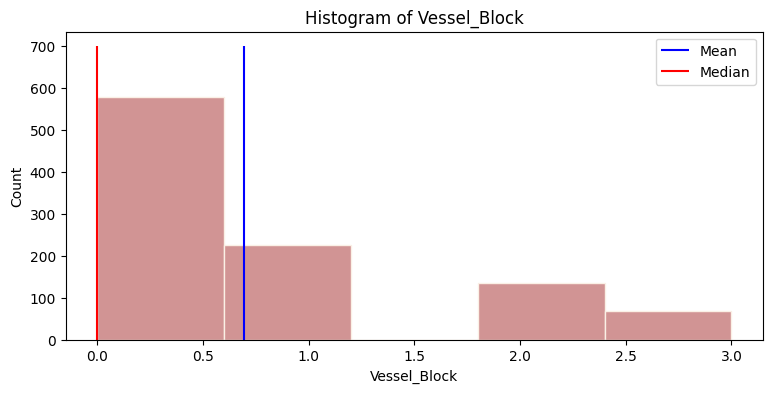

In [ ]:
plt.figure(figsize = (9,4))

sns.histplot(data = data ,x = 'Vessel_Block', color = 'Brown',
             edgecolor = 'linen', alpha = 0.5, bins = 5)

plt.title("Histogram of Vessel_Block")
plt.xlabel('Vessel_Block')
plt.ylabel('Count')
plt.vlines(data['Vessel_Block'].mean(), ymin = 0, ymax = 700, colors='blue', label='Mean')
plt.vlines(data['Vessel_Block'].median(), ymin = 0, ymax = 700, colors='red', label='Median')
plt.legend()
plt.show()

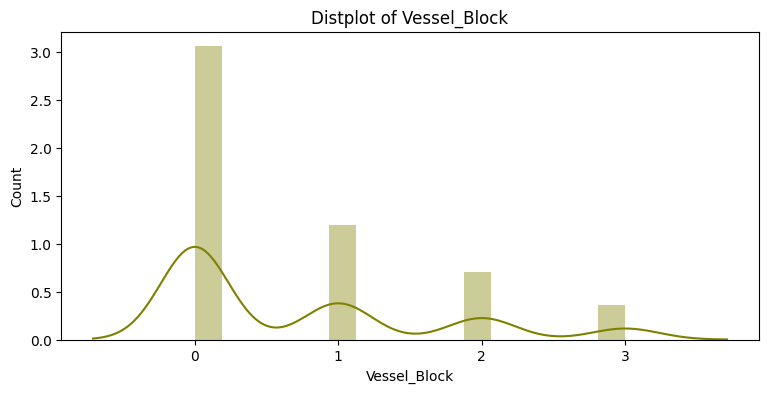

In [ ]:
plt.figure(figsize = (9,4))
sns.distplot(data['Vessel_Block'], color = 'Olive')
plt.title("Distplot of Vessel_Block")
plt.xlabel('Vessel_Block')
plt.ylabel('Count')
plt.show()

In [ ]:
# Calculate the skewwness of data
data['Vessel_Block'].skew()

1.1301356083003744

Since the skewness value is greater than 1, Vessel_Block data is positively skewed.

For skewed data we need to use the median technique to handle missing values

In [ ]:
col=data['Vessel_Block']
col=col.fillna(col.median(),inplace=True)

In [ ]:
col=data['thalassemia']
col=col.fillna(col.mode()[0],inplace=True)

In [ ]:
data.isnull().sum()

,0
age,0
sex,0
chest_pain_type,0
rest_bp,0
chol,0
fast_blood_sugar,0
restecg,0
max_heart_rate,0
exercise_induced_angina,0
st_depression,0


In [ ]:
data.shape

(1025, 14)

All the NaN Values are cleaned

### 2.6.Duplicate Values

In [ ]:
duplicate_rows = data[data.duplicated]
duplicate_rows

,age,sex,chest_pain_type,rest_bp,chol,fast_blood_sugar,restecg,max_heart_rate,exercise_induced_angina,st_depression,slope,Vessel_Block,thalassemia,target
15,34,Female,Atypical angina,118,210,Lower than 120mg/dl,Having ST-T wave abnormality,192,No,0.7,Downsloping,0.0,Fixed defect,Heart Disease
31,50,Female,Atypical angina,120,244,Lower than 120mg/dl,Having ST-T wave abnormality,162,No,1.1,Downsloping,0.0,Fixed defect,Heart Disease
43,46,Male,Typical angina,120,249,Lower than 120mg/dl,Normal,144,No,0.8,Downsloping,0.0,Reversible defect,No Heart Disease
55,55,Male,Typical angina,140,217,Lower than 120mg/dl,Having ST-T wave abnormality,111,Yes,5.6,Upsloping,0.0,Reversible defect,No Heart Disease
61,66,Female,Non-anginal pain,146,278,Lower than 120mg/dl,Normal,152,No,0.0,Flat,1.0,Fixed defect,Heart Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,Atypical angina,140,221,Lower than 120mg/dl,Having ST-T wave abnormality,164,Yes,0.0,Downsloping,0.0,Fixed defect,Heart Disease
1021,60,Male,Typical angina,125,258,Lower than 120mg/dl,Normal,141,Yes,2.8,Flat,1.0,Reversible defect,No Heart Disease
1022,47,Male,Typical angina,110,275,Lower than 120mg/dl,Normal,118,Yes,1.0,Flat,1.0,Fixed defect,No Heart Disease
1023,50,Female,Typical angina,110,254,Lower than 120mg/dl,Normal,159,No,0.0,Downsloping,0.0,Fixed defect,Heart Disease


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(302, 14)

# EDA(Exploratory Data Analysis)

## 3.Outliers

In [ ]:
data.head()

,age,sex,chest_pain_type,rest_bp,chol,fast_blood_sugar,restecg,max_heart_rate,exercise_induced_angina,st_depression,slope,Vessel_Block,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120mg/dl,Having ST-T wave abnormality,168,No,1.0,Downsloping,2.0,Reversible defect,No Heart Disease
1,53,Male,Typical angina,140,203,Greater than 120mg/dl,Normal,155,Yes,3.1,Upsloping,0.0,Reversible defect,No Heart Disease
2,70,Male,Typical angina,145,174,Lower than 120mg/dl,Having ST-T wave abnormality,125,Yes,2.6,Upsloping,0.0,Reversible defect,No Heart Disease
3,61,Male,Typical angina,148,203,Lower than 120mg/dl,Having ST-T wave abnormality,161,No,0.0,Downsloping,1.0,Reversible defect,No Heart Disease
4,62,Female,Typical angina,138,294,Greater than 120mg/dl,Having ST-T wave abnormality,106,No,1.9,Flat,3.0,Fixed defect,No Heart Disease


In [ ]:
data.describe()

,age,rest_bp,chol,max_heart_rate,st_depression,Vessel_Block
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046,0.665563
std,9.04797,17.563394,51.753489,22.903527,1.161452,0.935142
min,29.00000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000,0.000000
75%,61.00000,140.000000,274.750000,166.000000,1.600000,1.000000
max,77.00000,200.000000,564.000000,202.000000,6.200000,3.000000


### 3.1.Identifying the Outliers

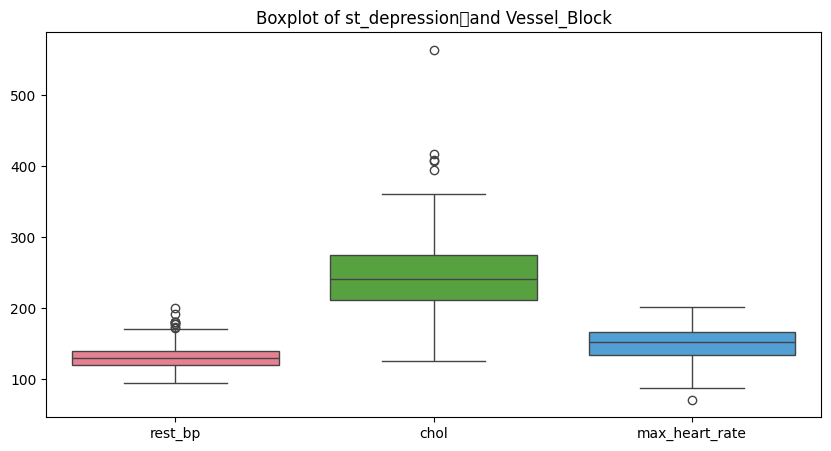

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data[['rest_bp','chol','max_heart_rate']], palette="husl")
plt.title("Boxplot of st_depression	and Vessel_Block")
plt.show()

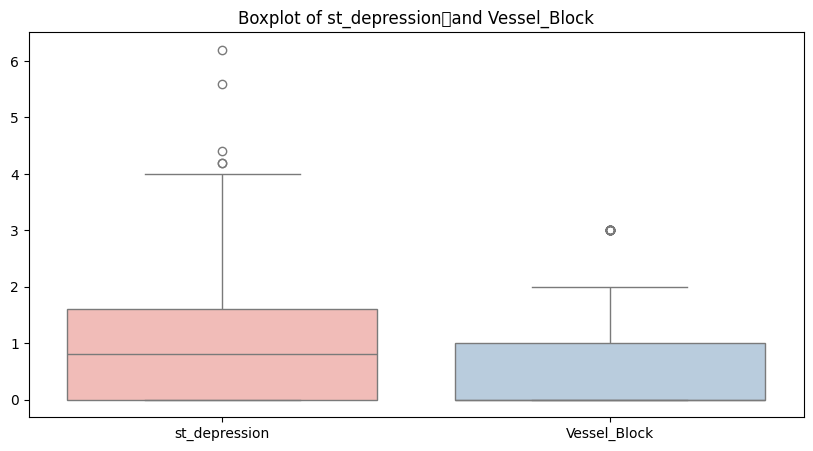

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data[['st_depression','Vessel_Block']], palette="Pastel1")
plt.title("Boxplot of st_depression	and Vessel_Block")
plt.show()

From the above BoxPlots , it is observed that there are outliers in the dataset.

### 3.2.Outliers Removal - IQR Technique

In [ ]:
data.shape

(302, 14)

In [ ]:
def find_outliers_IQR(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return lower_bound,upper_bound,outliers

In [ ]:
outliers_rest_bp = find_outliers_IQR(data["rest_bp"])
outliers_chol = find_outliers_IQR(data["chol"])
outliers_max_heart_rate = find_outliers_IQR(data["max_heart_rate"])
outliers_st_depression = find_outliers_IQR(data["st_depression"])

In [ ]:
data_no_outliers = data[~data["rest_bp"].isin(outliers_rest_bp)]
data_no_outliers = data_no_outliers[~data_no_outliers["chol"].isin(outliers_chol)]
data_no_outliers = data_no_outliers[~data_no_outliers["max_heart_rate"].isin(outliers_max_heart_rate)]
data_no_outliers = data_no_outliers[~data_no_outliers["st_depression"].isin(outliers_st_depression)]

In [ ]:
data_no_outliers.shape

(295, 14)

### 3.3.Percentage of Data Removal - Outliers

In [ ]:
percentage_removed = ((data.shape[0] - data_no_outliers.shape[0]) / data.shape[0]) * 100
print(f"Percentage of data removed: {percentage_removed:.2f}%")

Percentage of data removed: 2.32%


2.32% of data got removed after the removal of outliers.

## 4.Visualizations

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data1=data_no_outliers

In [ ]:
data1.head()

,age,sex,chest_pain_type,rest_bp,chol,fast_blood_sugar,restecg,max_heart_rate,exercise_induced_angina,st_depression,slope,Vessel_Block,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120mg/dl,Having ST-T wave abnormality,168,No,1.0,Downsloping,2.0,Reversible defect,No Heart Disease
1,53,Male,Typical angina,140,203,Greater than 120mg/dl,Normal,155,Yes,3.1,Upsloping,0.0,Reversible defect,No Heart Disease
2,70,Male,Typical angina,145,174,Lower than 120mg/dl,Having ST-T wave abnormality,125,Yes,2.6,Upsloping,0.0,Reversible defect,No Heart Disease
3,61,Male,Typical angina,148,203,Lower than 120mg/dl,Having ST-T wave abnormality,161,No,0.0,Downsloping,1.0,Reversible defect,No Heart Disease
4,62,Female,Typical angina,138,294,Greater than 120mg/dl,Having ST-T wave abnormality,106,No,1.9,Flat,3.0,Fixed defect,No Heart Disease


### Heart Disease Diagnostics

In [53]:
pip install pillow

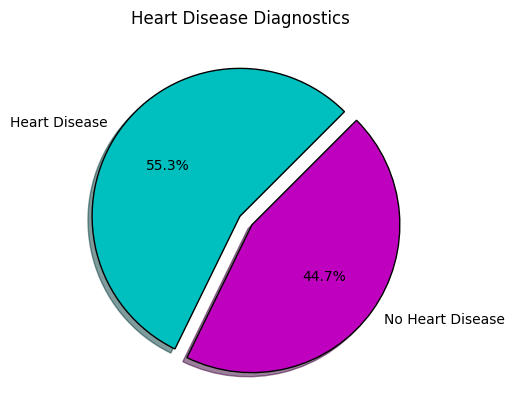

In [ ]:
index = data1['target'].value_counts().index
count = data1['target'].value_counts().values
plt.pie(count, labels = index, explode =[0,0.1], colors = ['c','m'], autopct = '%0.1f%%'
        , shadow = True ,startangle = 45, textprops = {'fontsize':10}
        , wedgeprops = {'linewidth':1,'width':1,'edgecolor':'k'})
plt.title('Heart Disease Diagnostics')
plt.show()

**From the given dataset 55.3% people are diagnosed with heart disease.**

#### Heart Disease Diagnostics based on Catergorical Variables

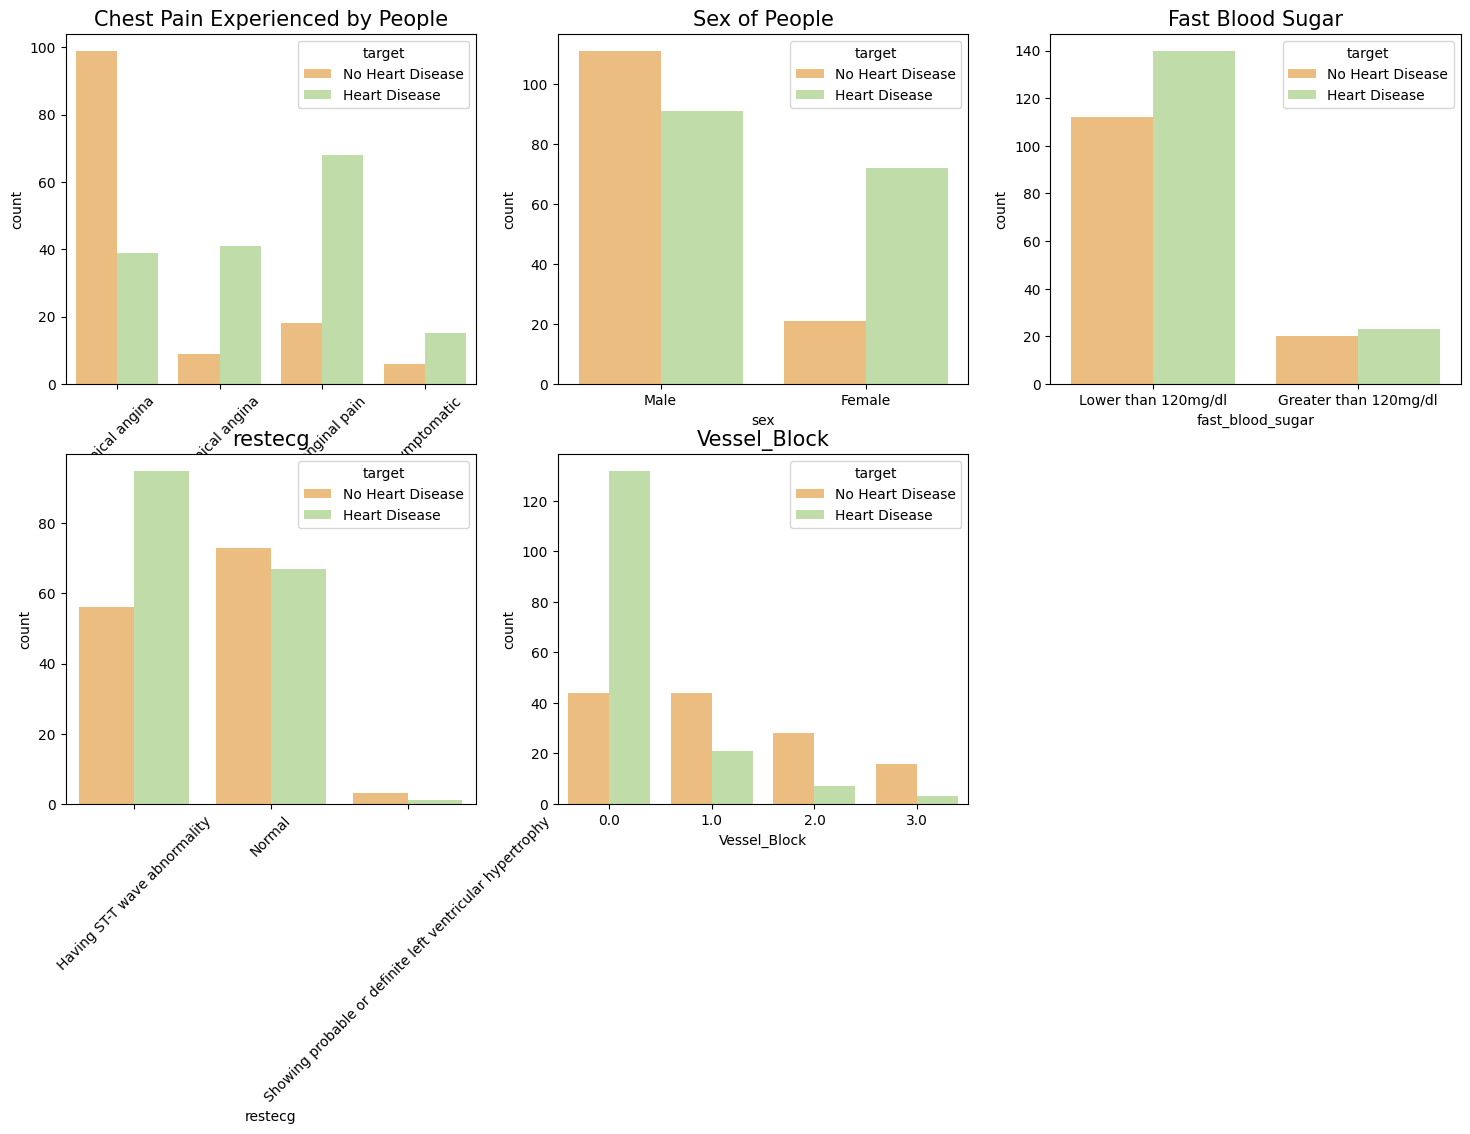

In [ ]:
plt.figure(figsize=(18, 10))
plt.subplot(2, 3, 1)
sns.countplot(x='chest_pain_type',hue='target',data=data1,palette='Spectral')
plt.title("Chest Pain Experienced by People", fontsize=15)
plt.xticks(rotation=45)

plt.subplot(2, 3, 2)
sns.countplot(x='sex',hue='target',data=data1,palette='Spectral')
plt.title("Sex of People", fontsize=15)

plt.subplot(2, 3, 3)
sns.countplot(x='fast_blood_sugar',hue='target',data=data1,palette='Spectral')
plt.title("Fast Blood Sugar", fontsize=15)

plt.subplot(2, 3, 4)
sns.countplot(x='restecg',hue='target',data=data1,palette='Spectral')
plt.title("restecg", fontsize=15)
plt.xticks(rotation=45)

plt.subplot(2, 3, 5)
sns.countplot(x='Vessel_Block',hue='target',data=data1,palette='Spectral')
plt.title("Vessel_Block", fontsize=15)

plt.show()

**Observation**
1. The individuals having Non-anginal chest pain are more likely to have Heart Disease.
2. As per the dataset, heart disease is more prevalent in males than females.
3. Individuals with fasting blood sugar levels lower than 120mg/dl are more prone to heart disease.
4. People with having ST-T wave abnormality are more likely to have heart disease.
5. People with 0 Vessel Block are more likely to have heart disease as per the dataset.

#### Heart Disease Diagnostics based on Numerical Variables

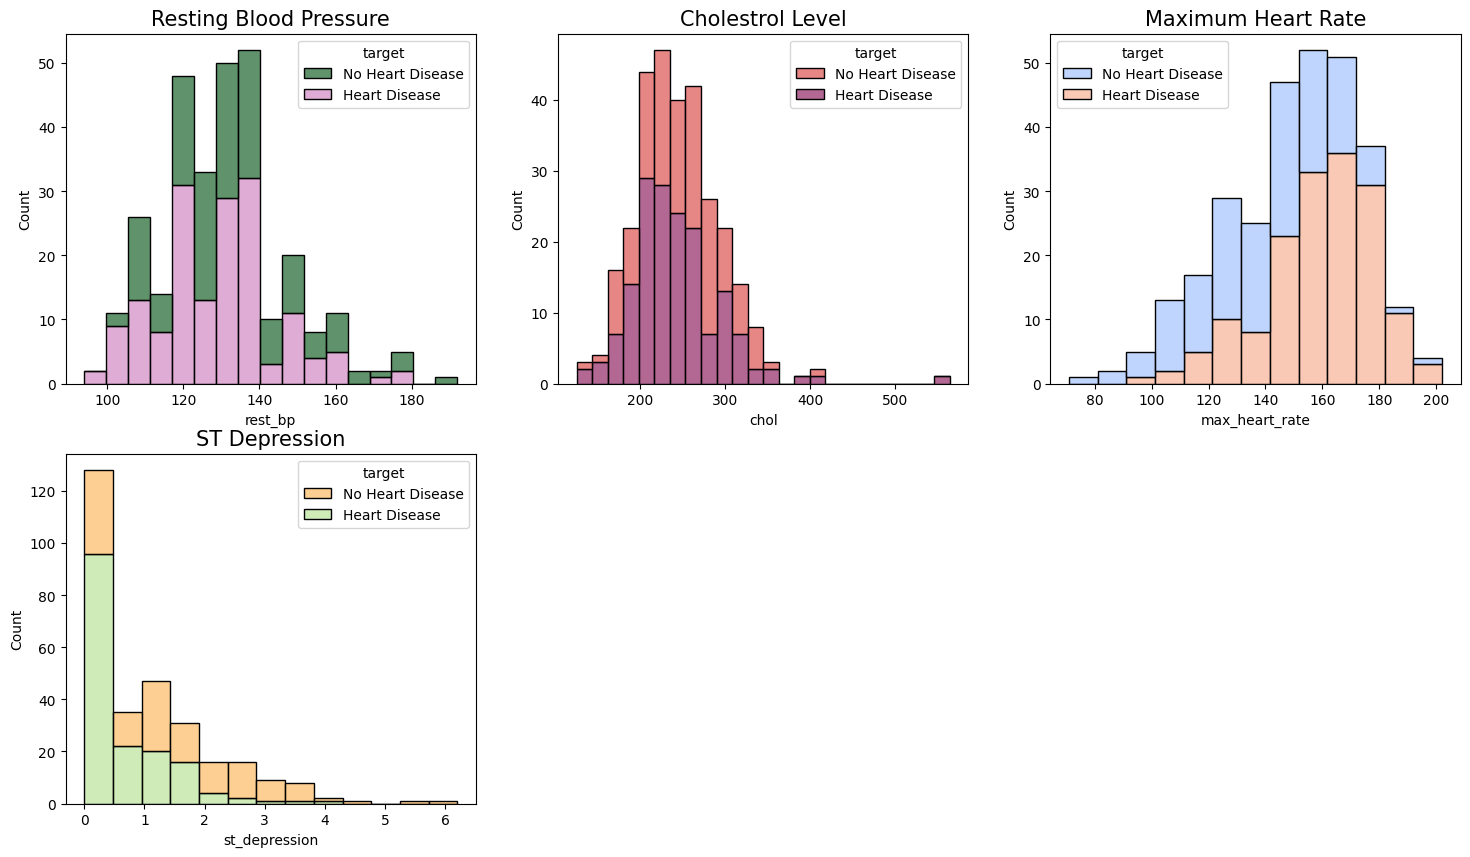

In [ ]:
plt.figure(figsize=(18, 10))
plt.subplot(2, 3, 1)
sns.histplot(x='rest_bp',hue='target',data=data1,palette='cubehelix', kde=False, multiple="stack")
plt.title("Resting Blood Pressure", fontsize=15)

plt.subplot(2, 3, 2)
sns.histplot(x='chol',hue='target',data=data1,palette='flare', kde=False, multiple="stack")
plt.title("Cholestrol Level", fontsize=15)

plt.subplot(2, 3, 3)
sns.histplot(x='max_heart_rate',hue='target',data=data1,palette='coolwarm', kde=False, multiple="stack")
plt.title("Maximum Heart Rate", fontsize=15)

plt.subplot(2, 3, 4)
sns.histplot(x='st_depression',hue='target',data=data1,palette='Spectral', kde=False, multiple="stack")
plt.title("ST Depression", fontsize=15)
plt.show()


**Observation**
1. People having resting blood pressure in range 120-140 are more prone to heart disease.
2. People having cholestrol level in range 200-300 are more prone to heart disease.
3. People having maximum heart rate in range 140-180 are more prone to heart disease.
4. People having ST depression in range 0-1 are more prone to heart disease.

#### Heart Disease Diagnostics Analysis based on Age

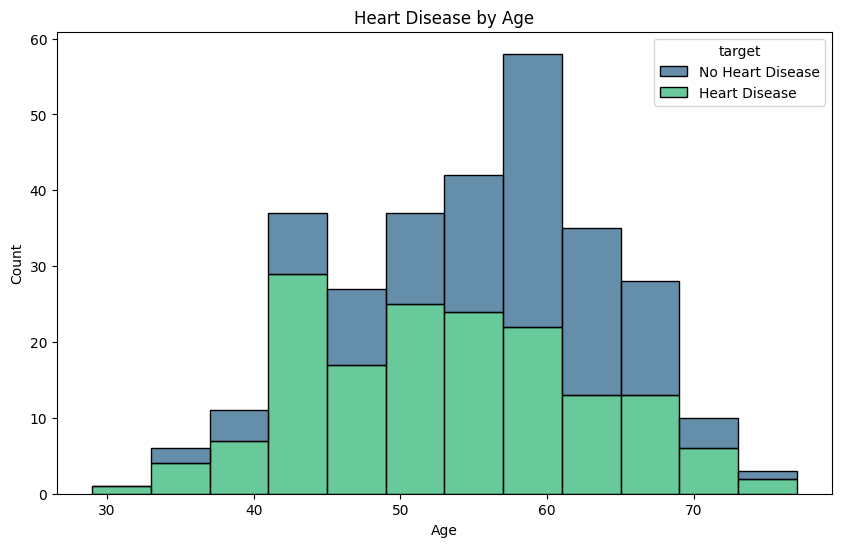

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x='age', hue='target', data=data1, palette='viridis', kde=False, multiple="stack")
plt.title('Heart Disease by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

 **Observation:**

  People in age group 50-60 are more prone to heart disease.

#### Heart Disease Diagnostics Analysis based on Thalassemia

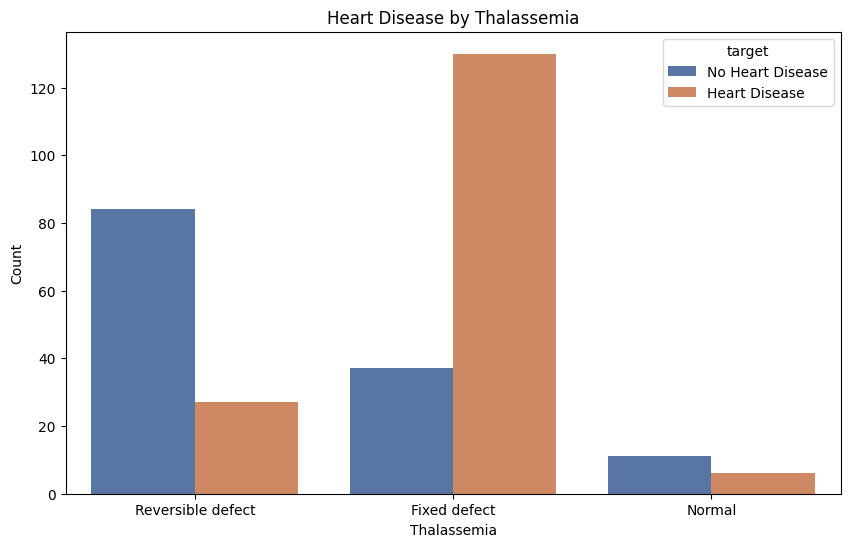

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='thalassemia', hue='target', data=data1, palette='deep')
plt.title('Heart Disease by Thalassemia')
plt.xlabel('Thalassemia')
plt.ylabel('Count')
plt.show()


**Observation:**

 People with reversible defect thalassemia are more prone to heart disease.

### Correlation Heatmap

In [ ]:
numerical_cols = data1.select_dtypes(include=['int64', 'float64']).columns

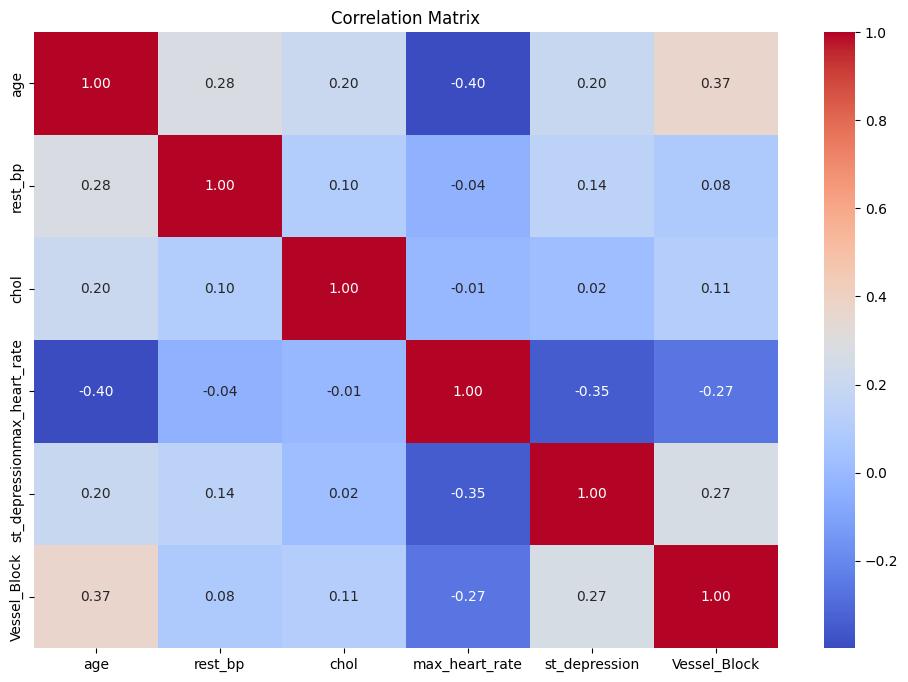

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data1[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Observation:**

* There is a positive correlation between age and st_depression, which indicates that as age increases, the likelihood of having ST depression also increases.
* There is a negative correlation between max_heart_rate and age, suggesting that as age increases, the maximum heart rate tends to decrease.
* There is a positive correlation between chest_pain_type and target, indicating that certain types of chest pain are more associated with heart disease.
* There is a positive correlation between exercise_induced_angina and st_depression, suggesting that individuals experiencing exercise-induced angina are more likely to have ST depression.
